<a href="https://colab.research.google.com/github/Evadacunha/2024_ells_python/blob/main/wednesday/08_wrk_data_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ELLS - Practical Introduction into Programming with Python

<a href="https://pef.czu.cz/en/"><img src="https://aleksejalex.4fan.cz/ells/temp_banner.jpeg?22" alt="banner" width="1000"></a>





[GitHub Repository](https://github.com/aleksejalex/2024_ells_python)


Plan for this lecture:
 - practice regression examples using python

## Exercise 1:
**Task**: Download the data and examinate the first 5 rows of the dataset.
```
URL to dataset: https://gist.githubusercontent.com/Alzpeta/c34c4959c7a10f7c70c0c93d102a4646/raw/41a9f1bbaae4a48cad668e7044f763c77a992116/gistfile3.txt
```

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
url= "https://gist.githubusercontent.com/Alzpeta/c34c4959c7a10f7c70c0c93d102a4646/raw/41a9f1bbaae4a48cad668e7044f763c77a992116/gistfile3.txt"
data= pd.read_csv(url)
data.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


## Exercise 2:
**Task**: Find out whether the variable "Hours Studied" or "Sleep Hours" has

*   larger mean
*   larger standard deviation

**Task**: What was the highest and lowest Performance Index. Construct a histogram plot for this variable


In [2]:
Study_Hours=data['Hours Studied']
Sleep_Hours=data['Sleep Hours']
meanstudy=np.mean(Study_Hours)
meansleep=np.mean(Sleep_Hours)
stdstudy=np.std(Study_Hours)
stdsleep=np.std(Sleep_Hours)
print(f'It is {meanstudy > meansleep} that the mean of study is greater than the mean of sleep hours.')
print(f'It is {stdstudy > stdsleep} that the standard deviation of study is greater than std of sleep hours.')

It is False that the mean of study is greater than the mean of sleep hours.
It is True that the standard deviation of study is greater than std of sleep hours.


Text(0, 0.5, 'Frequency')

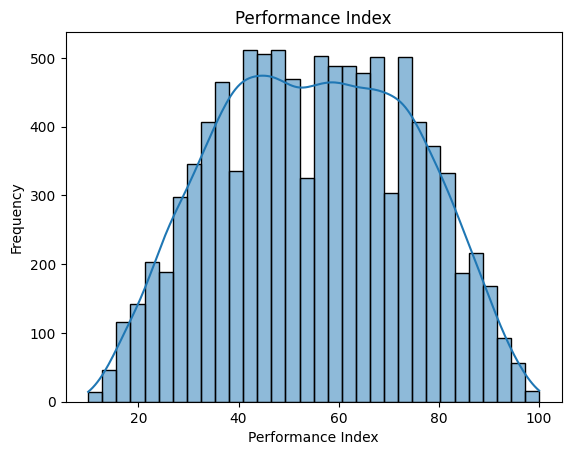

In [3]:
Performance_Index=data['Performance Index']
sns.histplot(Performance_Index, kde=True)
plt.title('Performance Index')
plt.xlabel('Performance Index')
plt.ylabel('Frequency')

## Exercise 3
**Task**: Find the linear regression equation for the variables performance index and previous scores.The variable **previous scores** is the independent variable ($X$) and the variable **performance index** is the dependent variable ($Y$)


1.   Use a scatter plot to plot the relationship between these variables and determine whether a linear regression is appropriate here
2.   Use the NumPy library to specify the intercept and the slope
3. Find out what the performence index would be if the previous score was **67**



slope: 1.0138367015830554
intercept: -15.181799427126386


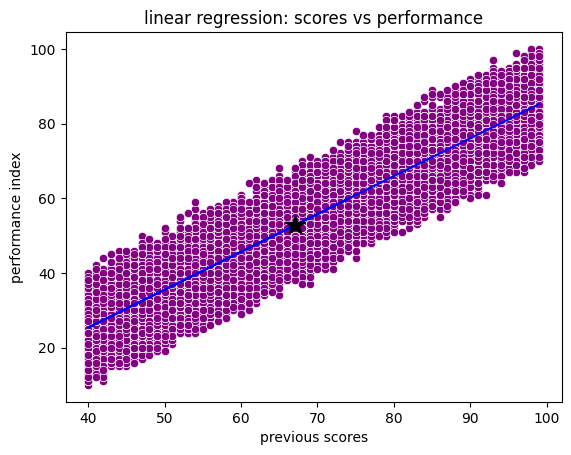

In [4]:
#1: Plot a scatter plot
Previous_Scores=data['Previous Scores']
sns.scatterplot(x=Previous_Scores, y=Performance_Index, color='purple')
plt.xlabel('previous scores')
plt.ylabel('performance index')
plt.title('linear regression: scores vs performance')
#seems like there is some kind of linear relationship

#2: Determine the slope and intercept from the Numpy library
slope, intercept = np.polyfit(Previous_Scores, Performance_Index, 1)
print("slope:", slope)
print("intercept:", intercept)
plt.plot(Previous_Scores, intercept+slope*Previous_Scores,color='b')

#3. Predict the performance index if the previous score is 67
sample_score=67
predicted_score=sample_score*slope + intercept
plt.plot(sample_score,predicted_score,color='black',ms=15,marker='*')
plt.show()


## Exercise 4
**Task**: Calculate again the linear regression, this time using the Stastmodels library.

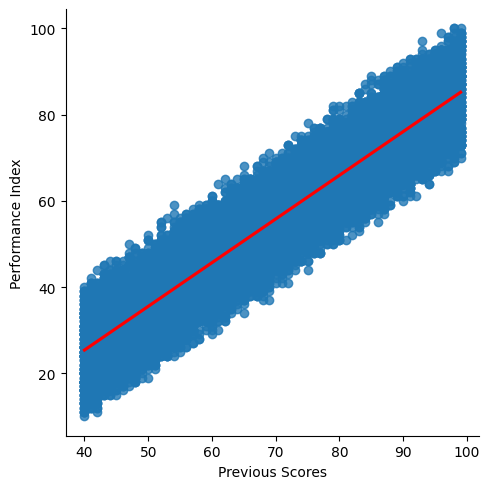

In [5]:
newdata = pd.DataFrame({'Previous Scores': Previous_Scores, 'Performance Index': Performance_Index})
sns.lmplot(x='Previous Scores', y='Performance Index', data=newdata, ci=None, line_kws={'color': 'red'}) #line doesn't go all the way to y-axis

## Exercise 5

**Task**: there is one variable in the dataset that is not numeric. Convert it into numerical form so it can be use for calculations


<details>
    <summary>Hint</summary>
    <i>The Extracurricular Activities variable has only two options - Yes / No. For example, you can use 1 to represent "Yes" and 0 to represent "No". Due to the high number of records in the dataset, do not do this conversion manually, but try to use some loop</i>
</details>






In [6]:
#Extracurricular=data["Extracurricular Activities"].astype(bool) doesn't work! boolean just checks if the extracurricular activities has string or not
#This also gave an error in the last exercise, but seems to be solved now as well.
convert=list()
for element in data["Extracurricular Activities"]:
  if element=="Yes":
    convert.append(1)
  else:
    convert.append(0)

## Exercise 6

**Task**: Perform a multiple regression. The dependent variable is still the **Performance Index**. Add the variables **Extracurricular Activities** and **Sample Question Papers Practiced** to the independent variable **Previous Scores**.
Compare how the coefficient of determination changes from the previous simple linear regression

In [7]:
import statsmodels.api as sm
#calculate linear R^2
X = sm.add_constant(Previous_Scores) #important to add!
model = sm.OLS(Performance_Index, X)
results=model.fit()
print(results.rsquared)
print(results.summary())


0.8375711642188021
                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                 5.156e+04
Date:                Wed, 10 Jul 2024   Prob (F-statistic):               0.00
Time:                        15:16:39   Log-Likelihood:                -34657.
No. Observations:               10000   AIC:                         6.932e+04
Df Residuals:                    9998   BIC:                         6.933e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -15.1

In [8]:
#calculate multivariate R^2
Sample=data["Sample Question Papers Practiced"]
A = np.column_stack((Previous_Scores, convert, Sample)) #create a stack of these variables
A = sm.add_constant(A)
print(A)
model2 = sm.OLS(Performance_Index, A)
#first parameter is y, second parameter is stack of x
results2 = model2.fit()
print(results2.rsquared) #R^2 = 0.839
#x1=slope,x2=slope,const=intercept
print(results2.summary())
params=results2.params
print(params) #intercept, previous scores, extra, sample


[[ 1. 99.  1.  1.]
 [ 1. 82.  0.  2.]
 [ 1. 51.  1.  2.]
 ...
 [ 1. 83.  1.  5.]
 [ 1. 97.  1.  0.]
 [ 1. 74.  0.  1.]]
0.839139671529976
                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                 1.738e+04
Date:                Wed, 10 Jul 2024   Prob (F-statistic):               0.00
Time:                        15:16:40   Log-Likelihood:                -34608.
No. Observations:               10000   AIC:                         6.922e+04
Df Residuals:                    9996   BIC:                         6.925e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      

## Exercise 7
**Task**: From the table in Exercise 6, read all the parameters needed for the regression equation. Predict the variable Performence Index if


*   Sample Question Papers Practiced = 10
*   Previsou Score = 67
*   Extracurricular Activities = Yes

Compare this prediction with the prediction from exercise 3, where only the previous score influenced the performance pndex





In [9]:
#predict the Performance Index
sample_question=10
sample_previous=67
sample_extra=1
prediction=params[0]+params[1]*sample_previous+params[2]*sample_extra+params[3]*sample_question
print(prediction)

54.36545810136126


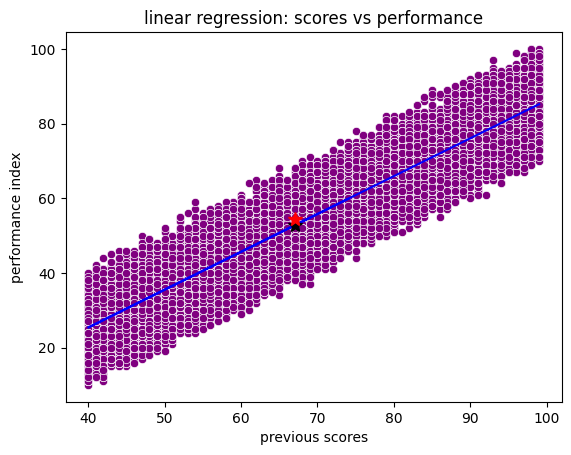

The first predicted score is 52.745259578938324 while the second predicted score is 54.36545810136126.


In [10]:
#1: Plot a scatter plot
sns.scatterplot(x=Previous_Scores, y=Performance_Index, color='purple')
plt.xlabel('previous scores')
plt.ylabel('performance index')
plt.title('linear regression: scores vs performance')
#seems like there is some kind of linear relationship

plt.plot(Previous_Scores, intercept+slope*Previous_Scores,color='b')

#3. Predict the performance index if the previous score is 67
sample_score=67
predicted_score=sample_score*slope + intercept
plt.plot(sample_score,predicted_score,color='black',ms=10,marker='*')
plt.plot(sample_previous,prediction,color='red',ms=10,marker='*')
plt.show()
print(f'The first predicted score is {predicted_score} while the second predicted score is {prediction}.')

<div style="font-style: italic; font-size: 14px;">
    <p>This material was prepared by Department of Information Engineering (<a href="https://www.pef.czu.cz/en">PEF ČZU</a>) exclusively for purposes of ELLS summer school "Practical Introduction into Programming with Python". Any distribution or reproduction of this material, in whole or in part, without prior written consent of the authors is prohibited.</p>
    <p>This material is shared under the <b>Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International Public License</b>, <a href="https://creativecommons.org/licenses/by-nc-nd/4.0/">link</a>.</p>
</div>
